<a href="https://colab.research.google.com/github/mekaneeky/GoMyCode-Intro2AI-notebooks/blob/main/GMC_AI_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 




In [ ]:
!gdown --id 1Yf8pIkoJ0XG-Wz9T46wYRVobRhbOUtq8

Downloading...
From: https://drive.google.com/uc?id=1Yf8pIkoJ0XG-Wz9T46wYRVobRhbOUtq8
To: /content/kc_house_data.csv
2.52MB [00:00, 78.1MB/s]


In [ ]:

boston_df = pd.read_csv("kc_house_data.csv")

In [ ]:
boston_df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
boston_df["date"] = pd.to_datetime(boston_df["date"])

## While they are finite numerical, they can be thought of as categories/districts
    #also I don't want non-relevant to appear in my correlation
boston_df["zipcode"] = pd.Categorical(boston_df["zipcode"])
boston_df["lat"] = boston_df["lat"].astype('object')
boston_df["long"] = boston_df["long"].astype('object')
boston_df["id"] = boston_df["id"].astype('string')






In [17]:
print(boston_df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [22]:
boston_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


In [23]:
boston_df[["sqft_lot15", "sqft_lot"]]

,sqft_lot15,sqft_lot
0,5650,5650
1,7639,7242
2,8062,10000
3,5000,5000
4,7503,8080
...,...,...
21608,1509,1131
21609,7200,5813
21610,2007,1350
21611,1287,2388


# Feature Selection

Based on the correlation analysis I am assuming that there are 2 types of features. Linearly correlated and non-linear variables. 

The non-linear variables are those that appear to have no linear correlation x < 0.1 will work well to explore non-linear relationships which might be mapped by polynomial regression, which while constructed from linear elemnets it can map non-linear relationships.

For Linear and multilinear regression I will use features that show moderate to high correlation x>=0.5 since non-linear features are not able to be mapped by linear models.

The non-linear features selected:



*   sqft_lot
*   yr_built


The linear features selected:

* sqft_living
* sqft_above
* grade


In [87]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(boston_df, test_size=0.2, random_state=42)

boston_df.sort_values("sqft_living", inplace=True)
train_df.sort_values("sqft_living", inplace=True)
test_df.sort_values("sqft_living", inplace=True)

x_linear_regression = boston_df["sqft_living"].values.reshape(-1,1)
x_linear_regression_training = train_df["sqft_living"].values.reshape(-1,1)
x_linear_regression_testing = test_df["sqft_living"].values.reshape(-1,1)

x_multilinear_regression = boston_df[ ["sqft_living", "sqft_above", "grade"] ]
x_multilinear_regression_training = train_df[ ["sqft_living", "sqft_above", "grade"] ].values
x_multilinear_regression_testing = test_df[ ["sqft_living", "sqft_above", "grade"] ].values

poly_multi_columns = [ "sqft_living", "sqft_above", "grade", "sqft_lot", "yr_built" ]
poly = PolynomialFeatures(degree = 2) 
x_polynomial = boston_df[ poly_multi_columns ]
x_polynomial = poly.fit_transform(x_polynomial)
x_polynomial_multi_training = train_df[ poly_multi_columns ].values
x_polynomial_multi_testing = test_df[ poly_multi_columns ].values
x_polynomial_multi_training = poly.fit_transform(x_polynomial_multi_training)
x_polynomial_multi_testing = poly.fit_transform(x_polynomial_multi_testing)

y = boston_df["price"].values.reshape(-1, 1)
y_training = train_df["price"].values.reshape(-1, 1)
y_testing = test_df["price"].values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [77]:
## Linear Regression

model=LinearRegression()   #build linear regression model
model.fit(x_linear_regression_training,y_training)  #fitting the training data
predicted=model.predict(x_linear_regression_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted))
print("R squared", metrics.r2_score(y_testing,predicted))

MSE 67008715590.74724
R squared 0.5053925773211261


The simple linear regression model has the poorest performance as expected. A simple line is not going to account for all the different cases that are present in this dataset

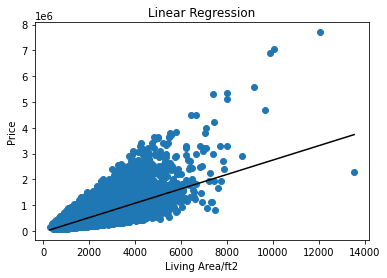

In [78]:
plt.scatter(x_linear_regression, y)
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model.predict(x_linear_regression),color="k")
plt.show()

In [88]:
model_multi=LinearRegression()   #build linear regression model
model_multi.fit(x_multilinear_regression_training,y_training)  #fitting the training data
predicted_multi=model_multi.predict(x_multilinear_regression_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted_multi))
print("R squared", metrics.r2_score(y_testing,predicted_multi))

MSE 59431573483.6537
R squared 0.5580186183549866


The Multi-linear model is able to improve performance slightly, however since it is still unable to predict non-linear relationships between features, there is still room for improvement.

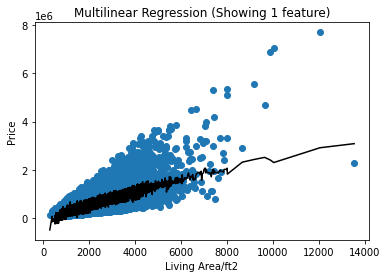

In [89]:
plt.scatter(x_linear_regression, y)
plt.title("Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model_multi.predict(x_multilinear_regression),color="k")
plt.show()

In [90]:
model_poly=LinearRegression()   #build polynomial multi regression model
model_poly.fit(x_polynomial_multi_training,y_training)  #fitting the training data
predicted_poly=model_poly.predict(x_polynomial_multi_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted_poly))
print("R squared", metrics.r2_score(y_testing,predicted_poly))

MSE 39591545534.40558
R squared 0.7055651571875181


The second degree polynomial model is able to learn from the non-linear features provided and thus is the best performing model. Using polynomials of the 3+ degree causes overfitting in this model

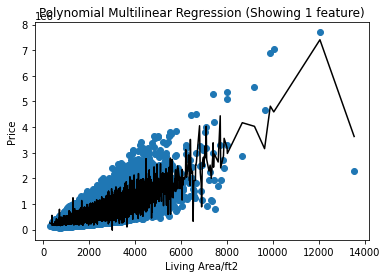

In [91]:
plt.scatter(x_linear_regression, y)
plt.title("Polynomial Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model_poly.predict(x_polynomial),color="k")
plt.show()